In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/Users/songzhao/Code Playground/xl/account_statement.csv')
df.head()

,Type,Product,Started Date,Completed Date,Description,Amount,Fee,Currency,State,Balance
0,TRANSFER,Current,2024-11-18 15:05:32,2024-11-18 15:05:33,From HANMEI YUAN,400.00,0.0,SEK,COMPLETED,400.00
1,FEE,Current,2024-11-18 15:14:35,2024-11-18 15:14:35,Card Delivery Fee,-89.99,0.0,SEK,COMPLETED,310.01
2,CARD_PAYMENT,Current,2024-11-19 15:37:20,2024-11-20 04:50:25,7-Eleven,-27.00,0.0,SEK,COMPLETED,283.01
3,CARD_PAYMENT,Current,2024-11-19 16:48:39,2024-11-20 13:40:51,Coop,-106.82,0.0,SEK,COMPLETED,176.19
4,TRANSFER,Current,2024-11-21 18:43:32,2024-11-21 18:43:32,From HANMEI YUAN,100.00,0.0,SEK,COMPLETED,276.19


In [3]:
df = df.drop(columns=['Product', 'Fee', 'Currency', 'State'])

In [4]:
df.head()

,Type,Started Date,Completed Date,Description,Amount,Balance
0,TRANSFER,2024-11-18 15:05:32,2024-11-18 15:05:33,From HANMEI YUAN,400.00,400.00
1,FEE,2024-11-18 15:14:35,2024-11-18 15:14:35,Card Delivery Fee,-89.99,310.01
2,CARD_PAYMENT,2024-11-19 15:37:20,2024-11-20 04:50:25,7-Eleven,-27.00,283.01
3,CARD_PAYMENT,2024-11-19 16:48:39,2024-11-20 13:40:51,Coop,-106.82,176.19
4,TRANSFER,2024-11-21 18:43:32,2024-11-21 18:43:32,From HANMEI YUAN,100.00,276.19


In [5]:
df[['Start Day', 'Start Time']] = df['Started Date'].str.split(' ', expand=True)

In [6]:
df[['Complete Day', 'Complete Time']] = df['Completed Date'].str.split(' ', expand=True)

In [7]:
df.head()

,Type,Started Date,Completed Date,Description,Amount,Balance,Start Day,Start Time,Complete Day,Complete Time
0,TRANSFER,2024-11-18 15:05:32,2024-11-18 15:05:33,From HANMEI YUAN,400.00,400.00,2024-11-18,15:05:32,2024-11-18,15:05:33
1,FEE,2024-11-18 15:14:35,2024-11-18 15:14:35,Card Delivery Fee,-89.99,310.01,2024-11-18,15:14:35,2024-11-18,15:14:35
2,CARD_PAYMENT,2024-11-19 15:37:20,2024-11-20 04:50:25,7-Eleven,-27.00,283.01,2024-11-19,15:37:20,2024-11-20,04:50:25
3,CARD_PAYMENT,2024-11-19 16:48:39,2024-11-20 13:40:51,Coop,-106.82,176.19,2024-11-19,16:48:39,2024-11-20,13:40:51
4,TRANSFER,2024-11-21 18:43:32,2024-11-21 18:43:32,From HANMEI YUAN,100.00,276.19,2024-11-21,18:43:32,2024-11-21,18:43:32


In [8]:
df = df.drop(columns=['Started Date', 'Completed Date'])
df.head()

,Type,Description,Amount,Balance,Start Day,Start Time,Complete Day,Complete Time
0,TRANSFER,From HANMEI YUAN,400.00,400.00,2024-11-18,15:05:32,2024-11-18,15:05:33
1,FEE,Card Delivery Fee,-89.99,310.01,2024-11-18,15:14:35,2024-11-18,15:14:35
2,CARD_PAYMENT,7-Eleven,-27.00,283.01,2024-11-19,15:37:20,2024-11-20,04:50:25
3,CARD_PAYMENT,Coop,-106.82,176.19,2024-11-19,16:48:39,2024-11-20,13:40:51
4,TRANSFER,From HANMEI YUAN,100.00,276.19,2024-11-21,18:43:32,2024-11-21,18:43:32


In [9]:
df.dtypes

Type              object
Description       object
Amount           float64
Balance          float64
Start Day         object
Start Time        object
Complete Day      object
Complete Time     object
dtype: object

In [10]:
df['Start Day'] = pd.to_datetime(df['Start Day'], format="%Y-%m-%d").dt.strftime("%m/%d")
df.head()

,Type,Description,Amount,Balance,Start Day,Start Time,Complete Day,Complete Time
0,TRANSFER,From HANMEI YUAN,400.00,400.00,11/18,15:05:32,2024-11-18,15:05:33
1,FEE,Card Delivery Fee,-89.99,310.01,11/18,15:14:35,2024-11-18,15:14:35
2,CARD_PAYMENT,7-Eleven,-27.00,283.01,11/19,15:37:20,2024-11-20,04:50:25
3,CARD_PAYMENT,Coop,-106.82,176.19,11/19,16:48:39,2024-11-20,13:40:51
4,TRANSFER,From HANMEI YUAN,100.00,276.19,11/21,18:43:32,2024-11-21,18:43:32


In [11]:
df['Complete Day'] = pd.to_datetime(df['Complete Day'], format="%Y-%m-%d").dt.strftime("%m/%d")

In [12]:
df.head()

,Type,Description,Amount,Balance,Start Day,Start Time,Complete Day,Complete Time
0,TRANSFER,From HANMEI YUAN,400.00,400.00,11/18,15:05:32,11/18,15:05:33
1,FEE,Card Delivery Fee,-89.99,310.01,11/18,15:14:35,11/18,15:14:35
2,CARD_PAYMENT,7-Eleven,-27.00,283.01,11/19,15:37:20,11/20,04:50:25
3,CARD_PAYMENT,Coop,-106.82,176.19,11/19,16:48:39,11/20,13:40:51
4,TRANSFER,From HANMEI YUAN,100.00,276.19,11/21,18:43:32,11/21,18:43:32


In [13]:
df_desc = df[['Description', 'Amount']]

In [14]:
df_desc

,Description,Amount
0,From HANMEI YUAN,400.00
1,Card Delivery Fee,-89.99
2,7-Eleven,-27.00
3,Coop,-106.82
4,From HANMEI YUAN,100.00
...,...,...
58,Exchanged to SEK,0.45
59,MAX Burgers,-44.00
60,McDonald's,-59.00
61,Karbokhandeln (sb),-35.00


In [15]:
for i in range(63):
    if ('Oo' or 'Öo') in df_desc.iloc[i, 0]:
        df_desc.iloc[i, 0] = 'ÖoB'
df_desc

,Description,Amount
0,From HANMEI YUAN,400.00
1,Card Delivery Fee,-89.99
2,7-Eleven,-27.00
3,Coop,-106.82
4,From HANMEI YUAN,100.00
...,...,...
58,Exchanged to SEK,0.45
59,MAX Burgers,-44.00
60,McDonald's,-59.00
61,Karbokhandeln (sb),-35.00


In [18]:
for i in range(63):
    if 'To ' in df_desc.iloc[i, 0]:
        df_desc.iloc[i, 0] = 'To Friend'

In [19]:
df_desc_group = df_desc.groupby('Description').sum()

In [20]:
df_desc_group = df_desc_group.reset_index()
df_desc_group

,Description,Amount
0,7-Eleven,-204.36
1,Asian Market,-295.00
2,Card Delivery Fee,-89.99
3,Coop,-850.69
4,Costco,-70.00
5,DinSko,-199.00
6,Exchanged to SEK,0.45
7,From HANMEI YUAN,4500.00
8,H&M,-49.99
9,Hemköp,-347.25


In [21]:
df_desc_group['Type'] = ['Food', 'Daily', 'Other', 'Daily', 'Daily', 'Clothes',
                         'Other', 'Other', 'Clothes', 'Daily', 'Food', 'Study',
                         'Food', 'Food', 'Food', 'Other', 'Toilet', 'Food',
                         'Other', 'Toilet', 'Daily', 'Clothes', 'Clothes', 'Daily']

In [24]:
df_temp = df_desc_group.groupby('Type').sum()

In [26]:
df_temp = df_temp.drop(index='Other')

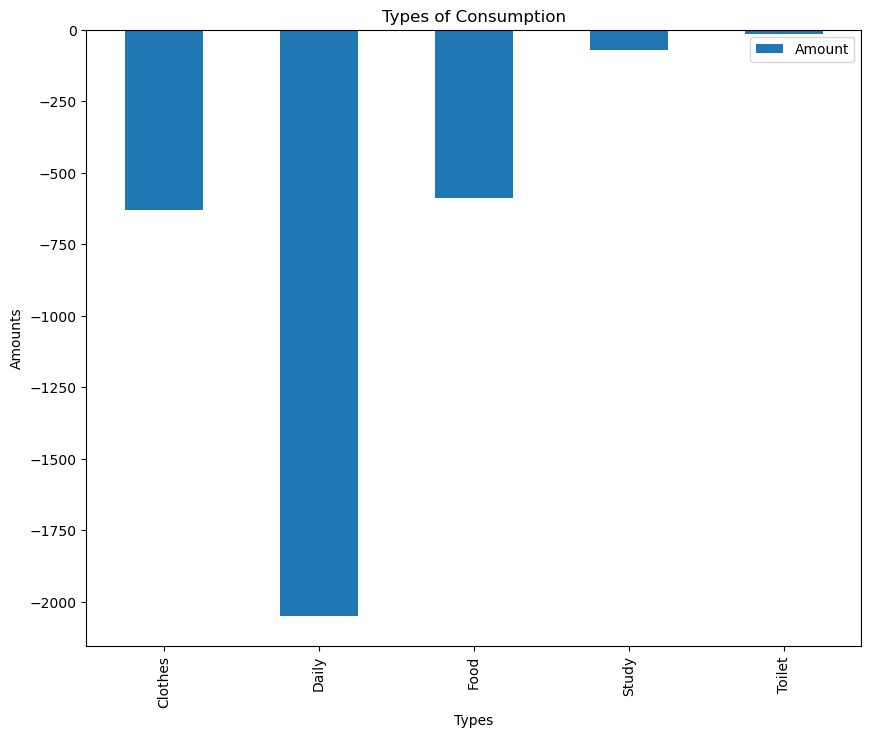

In [27]:
df_temp.plot(kind='bar',
             figsize=(10,8),
             title='Types of Consumption',
             xlabel='Types',
             ylabel='Amounts')
plt.show()